<a href="https://colab.research.google.com/github/muhammed3ly/CNN-Assignment/blob/master/.ipynb_checkpoints/CNN%20assignment-checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
import os
import numpy as np
import pandas as pd
import h5py
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer, AveragePooling2D
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
random.seed(10)

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [3]:
classes = np.unique(trainY)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

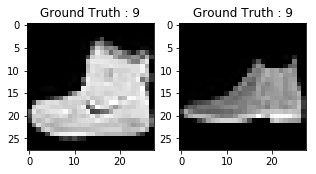

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(trainX[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(trainY[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(testX[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(testY[0]))

In [ ]:
trainX = trainX.reshape(-1, 28,28, 1)
testX = testX.reshape(-1, 28,28, 1)
trainX.shape, testX.shape

In [ ]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
testX /= 255.0
trainX /= 255.0

In [ ]:
trainY = to_categorical(trainY)
trainY

In [ ]:
testY = to_categorical(testY)
testY

In [ ]:
trainX,validX,trainY,validY = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

In [ ]:
input_reshape = (28, 28, 1)

pool_size = (2, 2)

hidden_num_units = 30
output_num_units = 10

epochs = 35
batch_size = 64

model = Sequential([
 Convolution2D(32, kernel_size = (3, 3) ,activation='relu',input_shape=(28,28,1)),
    
 Convolution2D(64, 3, 3, activation='relu', name = 'Conv1'),
 MaxPooling2D(pool_size=pool_size, name = 'Pooling1'),

 Convolution2D(128, 3, 3, activation='relu', name = 'Conv2'),
 MaxPooling2D(pool_size=pool_size, name = 'Pooling2'),

 Flatten(),

 Dense(output_dim=hidden_num_units, activation='relu', name = 'Dense1'),
 Dropout(0.6),
    
 Dense(output_dim=output_num_units, activation='softmax', name = 'out'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
model.load_weights('model_weights.h5')

In [ ]:
test_eval = model.evaluate(testX, testY, verbose=0)

In [ ]:
test_eval